<a href="https://colab.research.google.com/github/Astraxx04/ML_Models/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import sklearn

import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

assert tf.config.list_physical_devices('GPU')

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Convolutions with hand designed filters

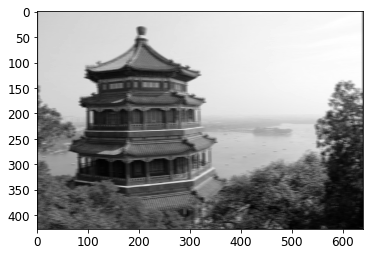

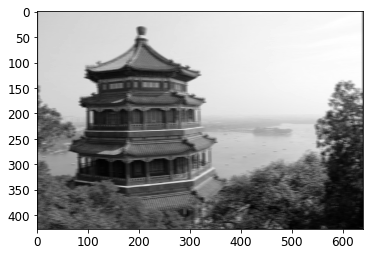

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape


filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0,:, :, 1], cmap="gray") #plot 1st image's first feature map
plt.show()
plt.imshow(outputs[0,:, :, 1], cmap="gray") #plot 2nd image's second feature map
plt.show()


Keras Layers

Conv2D

In [ ]:
conv = keras.layers.Conv2D(
    filters=2, kernel_size=7, strides=1,
    padding="SAME", activation="relu", input_shape=outputs.shape
)

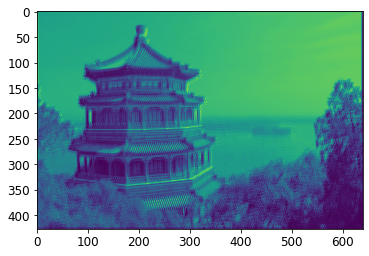

In [ ]:
conv_outputs = conv(images)
conv_outputs.shape
plt.imshow(conv_outputs[0, :, :, 0])

Max Pool

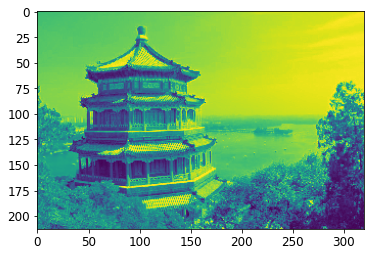

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
mp_output = max_pool(images)
plt.imshow(mp_output[0,:,:,0])

Download and Normalize Fashion MNIST


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:-5000]/255., X_train_full[-5000:]/255. 
y_valid, y_train = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test/255.


X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5000, 28, 28, 1)

In [ ]:
keras.backend.clear_session()

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME"
                        )


model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

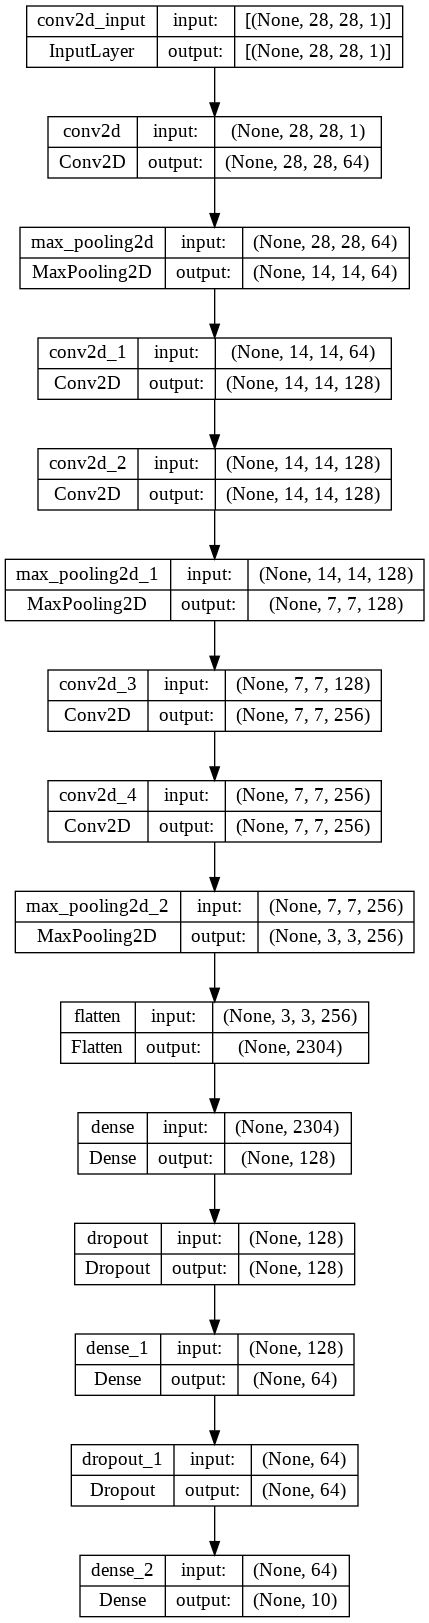

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:

model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
history = model.fit(
    X_train, y_train, epochs =30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
157/157 [==============================] - 7s 42ms/step - loss: 2.2876 - sparse_categorical_accuracy: 0.1656 - val_loss: 2.2514 - val_sparse_categorical_accuracy: 0.3205
Epoch 2/30
157/157 [==============================] - 6s 42ms/step - loss: 2.1359 - sparse_categorical_accuracy: 0.2274 - val_loss: 1.7607 - val_sparse_categorical_accuracy: 0.4427
Epoch 3/30
157/157 [==============================] - 6s 38ms/step - loss: 1.7443 - sparse_categorical_accuracy: 0.3498 - val_loss: 1.3523 - val_sparse_categorical_accuracy: 0.5182
Epoch 4/30
157/157 [==============================] - 6s 40ms/step - loss: 1.4478 - sparse_categorical_accuracy: 0.4464 - val_loss: 1.0362 - val_sparse_categorical_accuracy: 0.6216
Epoch 5/30
157/157 [==============================] - 12s 74ms/step - loss: 1.2906 - sparse_categorical_accuracy: 0.5080 - val_loss: 0.9891 - val_sparse_categorical_accuracy: 0.6027
Epoch 6/30
157/157 [==============================] - 11s 73ms/step - loss: 1.1866 - sparse_ca

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5360 - sparse_categorical_accuracy: 0.8050


[0.5359914898872375, 0.8050000071525574]